In [1]:
import sys
sys.path.append('/Users/basileroth/Desktop/Code/offseason_greenlobby/')
from offseason_greenlobby.utils.get_entities import detect_organizations
import pandas as pd

/Users/basileroth/Desktop/Code/offseason_greenlobby/gl/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("/Users/basileroth/Desktop/Code/offseason_greenlobby/data/processed/LOI_VERTE/df_total.csv",index_col=0)

print(df.shape)

res = detect_organizations(df)

Device set to use mps:0


(3120, 7)


In [3]:
import ast
orgs = []
for lob in res.lobbys.values:
    if len(lob) > 2:
        orgs.extend(ast.literal_eval(lob))

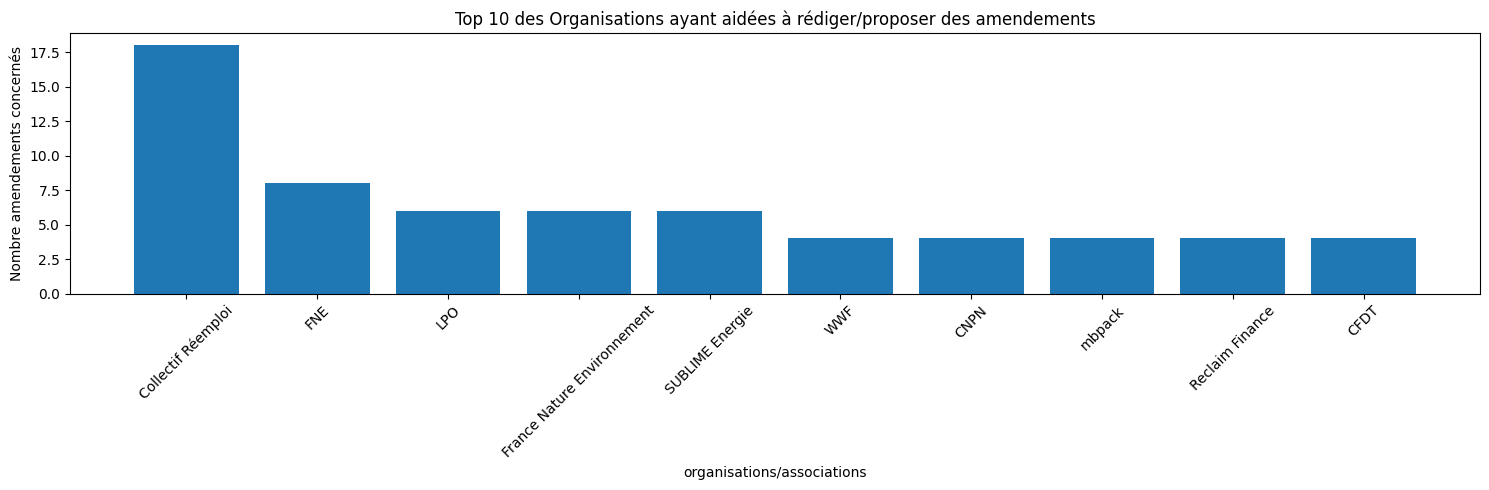

In [4]:
from collections import Counter
import matplotlib.pyplot as plt
n = 10
count_dict = Counter(orgs)

# Sort the dictionary by values in descending order
sorted_items = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)

# Take the first 10 elements
top_10_items = sorted_items[:n]
keys, values = zip(*top_10_items)

# Create bar plot
plt.figure(figsize=(15, 5))
plt.bar(keys, values)
plt.ylabel('Nombre amendements concernés')
plt.xlabel('organisations/associations')
plt.title('Top 10 des Organisations ayant aidées à rédiger/proposer des amendements')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()